In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("travelers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    547568 non-null  int64  
 1   Gender                                 547568 non-null  object 
 2   Occupation                             547568 non-null  object 
 3   Travel Class                           547568 non-null  object 
 4   Destination                            547568 non-null  object 
 5   Star System                            547568 non-null  object 
 6   Distance to Destination (Light-Years)  547568 non-null  float64
 7   Duration of Stay (Earth Days)          547568 non-null  float64
 8   Number of Companions                   547568 non-null  int64  
 9   Purpose of Travel                      547568 non-null  object 
 10  Transportation Type                    547568 non-null  

In [4]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})


In [5]:
df['Loyalty Program Member'] = df['Loyalty Program Member'].map({'No': 1, 'Yes': 2})


In [6]:
df = df.drop(['Occupation', "Travel Class", "Destination", "Star System", "Transportation Type", "Purpose of Travel", "Booking Date", "Departure Date", "Special Requests", "Loyalty Program Member", "Month", "Customer Satisfaction Score", "Number of Companions", "Duration of Stay (Earth Days)"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 4 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    547568 non-null  int64  
 1   Gender                                 547568 non-null  int64  
 2   Distance to Destination (Light-Years)  547568 non-null  float64
 3   Price (Galactic Credits)               547568 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 16.7 MB


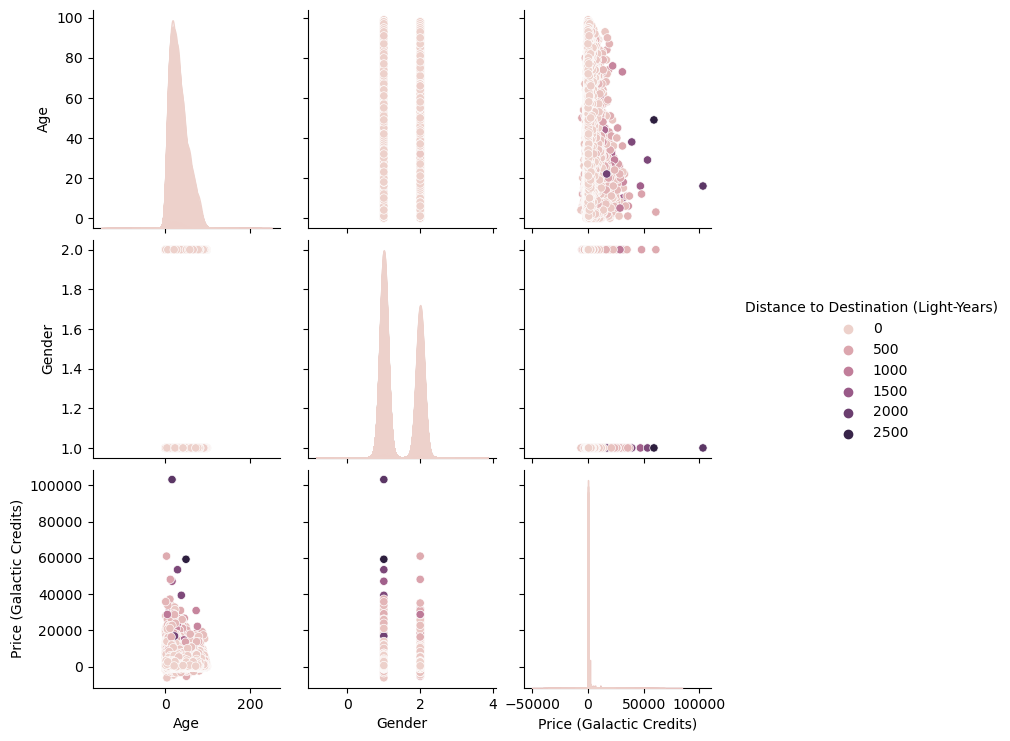

In [8]:
sns.pairplot(data=df, hue="Distance to Destination (Light-Years)")

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=19, min_samples=4)

In [10]:
dbscan.fit(df)

DBSCAN(eps=19, min_samples=4)

In [11]:
predictions = dbscan.fit_predict(df)
df["Clusters"] = predictions
sns.scatterplot(data=df, x="Age", y="Distance to Destination (Light-Years)", hue="Clusters")

<AxesSubplot:xlabel='Age', ylabel='Distance to Destination (Light-Years)'>

In [12]:
from sklearn.metrics import silhouette_score

In [ ]:
sScore = silhouette_score(df, predictions)

In [ ]:
sScore